In [1]:
!pip install langid
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941172 sha256=9584e11dfc0815c1ef7b8bfb1125bac65cb830b45973325b5b7562b8a0e07062
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=bebe9a038036ed5f1dc70c1aa5d7147188a527fc7f4bffdf4f329e48c82ee64c
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType
import langid


# Crear SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Leer el archivo CSV
#data = spark.read.csv('thebeatles.csv', header=True, sep=",")
data = spark.read.csv('thebeatles350.csv', header=True, sep=",")

data.show(10)


+---------------+------------+-------------+
|           Name|     Comment|(view source)|
+---------------+------------+-------------+
|    chloelassen|          ❤️| view comment|
|cristina_fran25|  ❤️🔥😮😢❤️| view comment|
|     saramcoser|😍😍😍😍😍😍| view comment|
|  ex.why.__.zed| Los amo😍😍| view comment|
|    _mairamaiaa|          🤍| view comment|
|  jette.geesing|        😍😍| view comment|
| rodrigorojasjr|        😍😍| view comment|
|        giuze24|          ❤️| view comment|
|    fedemorenop|    ♥️♥️♥️♥️| view comment|
|emilianocmagana|   awwwww ;)| view comment|
+---------------+------------+-------------+
only showing top 10 rows



In [5]:
data.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Comment: string (nullable = true)
 |-- (view source): string (nullable = true)



In [6]:
df = data.toPandas()
print(df)

                Name                                            Comment  \
0        chloelassen                                                 ❤️   
1    cristina_fran25                                            ❤️🔥😮😢❤️   
2         saramcoser                                             😍😍😍😍😍😍   
3      ex.why.__.zed                                          Los amo😍😍   
4        _mairamaiaa                                                  🤍   
..               ...                                                ...   
344    e11a3lisab3th                                             crying   
345      gittemorten                                             ❤️❤️❤️   
346          pax_sac                                Goosebumps❤️❤️❤️🔥🔥🔥   
347    blaster_fhuoi  Melhor música do mundo, o Brasil está emociona...   
348  praise.alexis05                              it was so beautiful 🥲   

    (view source)  
0    view comment  
1    view comment  
2    view comment  
3    view comment  

In [7]:
df.size # Esto imprimirá el número total de elementos en el DataFrame

1047

In [8]:
df.columns

Index(['Name', 'Comment', '(view source)'], dtype='object')

In [9]:
def analizar_sentimiento(texto):
    if texto is None or pd.isnull(texto):
        return np.nan

    sia = SentimentIntensityAnalyzer()
    sentimiento = sia.polarity_scores(str(texto))["compound"]

    if sentimiento > 0.1:
        return "Sentimiento Positivo"
    elif sentimiento < 0:
        return "Sentimiento Negativo"
    else:
        return "Sentimiento Neutral"


In [10]:
import nltk
nltk.download('popular')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia= SentimentIntensityAnalyzer()

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [11]:
df.columns

Index(['Name', 'Comment', '(view source)'], dtype='object')

In [12]:
import pandas as pd
df['Sentimiento'] = df['Comment'].apply(analizar_sentimiento)
df.head(10)

,Name,Comment,(view source),Sentimiento
0,chloelassen,❤️,view comment,Sentimiento Neutral
1,cristina_fran25,❤️🔥😮😢❤️,view comment,Sentimiento Neutral
2,saramcoser,😍😍😍😍😍😍,view comment,Sentimiento Neutral
3,ex.why.__.zed,Los amo😍😍,view comment,Sentimiento Neutral
4,_mairamaiaa,🤍,view comment,Sentimiento Neutral
5,jette.geesing,😍😍,view comment,Sentimiento Neutral
6,rodrigorojasjr,😍😍,view comment,Sentimiento Neutral
7,giuze24,❤️,view comment,Sentimiento Neutral
8,fedemorenop,♥️♥️♥️♥️,view comment,Sentimiento Neutral
9,emilianocmagana,awwwww ;),view comment,Sentimiento Positivo


In [13]:
def clean_text3(Comment):
  text = re.sub(r'^RT[\s]+', '', Comment)
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', Comment)
  text = re.sub(r'#', '', Comment)
  text = re.sub(r'@[A-Za-z0-9]+', '', Comment)
  return text

In [16]:
# Registrar la función como un UDF de Spark
clean_text3_udf = udf(clean_text3, StringType())
data = data.withColumn('Cleaned_Comment', clean_text3_udf(col('Comment')))


In [17]:
import re
data.show(10)

+---------------+------------+-------------+---------------+
|           Name|     Comment|(view source)|Cleaned_Comment|
+---------------+------------+-------------+---------------+
|    chloelassen|          ❤️| view comment|             ❤️|
|cristina_fran25|  ❤️🔥😮😢❤️| view comment|     ❤️🔥😮😢❤️|
|     saramcoser|😍😍😍😍😍😍| view comment|   😍😍😍😍😍😍|
|  ex.why.__.zed| Los amo😍😍| view comment|    Los amo😍😍|
|    _mairamaiaa|          🤍| view comment|             🤍|
|  jette.geesing|        😍😍| view comment|           😍😍|
| rodrigorojasjr|        😍😍| view comment|           😍😍|
|        giuze24|          ❤️| view comment|             ❤️|
|    fedemorenop|    ♥️♥️♥️♥️| view comment|       ♥️♥️♥️♥️|
|emilianocmagana|   awwwww ;)| view comment|      awwwww ;)|
+---------------+------------+-------------+---------------+
only showing top 10 rows



In [18]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Descargar el léxico de VADER
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Emoticones que indican Sentimiento Positivo
emoticones_positivos = ["❤️", "😍", "🔥", "🤍", "😊", "👏", "😭", "🙌", "🥰", "👀", "😢", "✨", "🎼", "👼", "♾️", "🥺", "💙", "🫶", "🏆", "🚬", "🤘", "💖", "💚", "🧡", "💜", "🎶", "🎸", "🥁", "🎤", "🦆"]


def analizar_sentimiento(comment_limpo):
    if comment_limpo is None or pd.isnull(comment_limpo):
        return np.nan

    sentimiento = sia.polarity_scores(comment_limpo)["compound"]

    # Analizar si el texto contiene emoticones positivos
    for emoticon in emoticones_positivos:
        if emoticon in comment_limpo:
            return "Positivo"

    if sentimiento > 0.1:
        return "Positivo"
    elif sentimiento < 0:
        return "Negativo"
    else:
        return "Neutral"


# Luego, puedes usar esta función para analizar el sentimiento en tus comentarios limpios
df['Sentimiento2'] = df['Comment'].apply(analizar_sentimiento)
df.head(10)  # Seleccionar las columnas que deseas imprimir


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Name,Comment,(view source),Sentimiento,Sentimiento2
0,chloelassen,❤️,view comment,Sentimiento Neutral,Positivo
1,cristina_fran25,❤️🔥😮😢❤️,view comment,Sentimiento Neutral,Positivo
2,saramcoser,😍😍😍😍😍😍,view comment,Sentimiento Neutral,Positivo
3,ex.why.__.zed,Los amo😍😍,view comment,Sentimiento Neutral,Positivo
4,_mairamaiaa,🤍,view comment,Sentimiento Neutral,Positivo
5,jette.geesing,😍😍,view comment,Sentimiento Neutral,Positivo
6,rodrigorojasjr,😍😍,view comment,Sentimiento Neutral,Positivo
7,giuze24,❤️,view comment,Sentimiento Neutral,Positivo
8,fedemorenop,♥️♥️♥️♥️,view comment,Sentimiento Neutral,Neutral
9,emilianocmagana,awwwww ;),view comment,Sentimiento Positivo,Positivo


Counter({'Positivo': 284, 'Neutral': 52, 'Negativo': 13})


<Axes: xlabel='Sentimiento2', ylabel='count'>

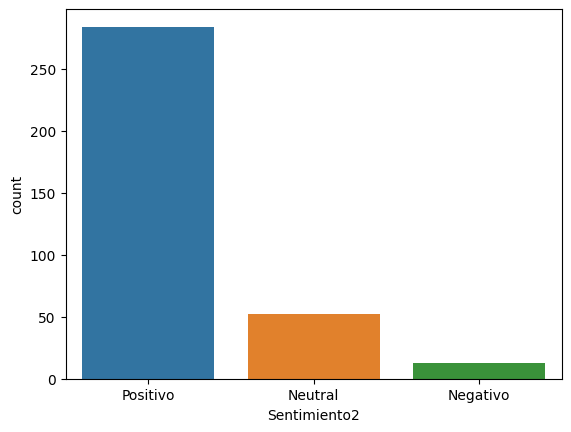

In [19]:
import seaborn as sns
x = df.Comment
y = df.Sentimiento2

from collections import Counter

print(Counter(y))
sns.countplot(x=y)

In [21]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Definir la función clean_text3
def clean_text3(comment):
    if isinstance(comment, str):
        # Realizar las sustituciones solo si el comentario es una cadena
        text = re.sub(r'^RT[\s]+', '', comment)
        text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
        text = re.sub(r'#', '', text)
        text = re.sub(r'@[A-Za-z0-9]+', '', text)
        return text
    else:
        return comment

# Registrar la función como un UDF de Spark
clean_text_udf = udf(clean_text3, StringType())
data = data.withColumn('Cleaned_Comment', clean_text_udf(col('Comment')))


In [22]:
# Definir la función UDF para detectar el idioma en la columna limpia
def detect_language(cleaned_comment):
    return langid.classify(cleaned_comment)[0]

# Registrar la función UDF en Spark
langid_udf = udf(detect_language, StringType())

# Aplicar la función UDF a la columna 'Cleaned_Comment' y agregar el resultado como nueva columna 'Language'
data = data.withColumn('Language', langid_udf(col('Cleaned_Comment')))
data.show(10)


+---------------+------------+-------------+---------------+--------+
|           Name|     Comment|(view source)|Cleaned_Comment|Language|
+---------------+------------+-------------+---------------+--------+
|    chloelassen|          ❤️| view comment|             ❤️|      zh|
|cristina_fran25|  ❤️🔥😮😢❤️| view comment|     ❤️🔥😮😢❤️|      zh|
|     saramcoser|😍😍😍😍😍😍| view comment|   😍😍😍😍😍😍|      ml|
|  ex.why.__.zed| Los amo😍😍| view comment|    Los amo😍😍|      es|
|    _mairamaiaa|          🤍| view comment|             🤍|      mr|
|  jette.geesing|        😍😍| view comment|           😍😍|      sl|
| rodrigorojasjr|        😍😍| view comment|           😍😍|      sl|
|        giuze24|          ❤️| view comment|             ❤️|      zh|
|    fedemorenop|    ♥️♥️♥️♥️| view comment|       ♥️♥️♥️♥️|      zh|
|emilianocmagana|   awwwww ;)| view comment|      awwwww ;)|      en|
+---------------+------------+-------------+---------------+--------+
only showing top 10 rows



In [24]:
# Filtrar comentarios en inglés
df_ingles = data.filter(col('Language') == 'en')
df_ingles.show()  # Muestra los primeros 10 comentarios en inglés en la consola

# Filtrar comentarios en español
df_espanol = data.filter(col('Language') == 'es')
df_espanol.show()  # Muestra los primeros 10 comentarios en inglés en la consola

+------------------+--------------------+-------------+--------------------+--------+
|              Name|             Comment|(view source)|     Cleaned_Comment|Language|
+------------------+--------------------+-------------+--------------------+--------+
|   emilianocmagana|           awwwww ;)| view comment|           awwwww ;)|      en|
|          axa.nz__|i just listened i...| view comment|i just listened i...|      en|
|         maiifonte|   Ok, I'm crying...| view comment|   Ok, I'm crying...|      en|
|     imagine_suman|We r lucky to wit...| view comment|We r lucky to wit...|      en|
|      mitchjohn117|50 years from now...| view comment|50 years from now...|      en|
|           klefour|               Great| view comment|               Great|      en|
|        tree.angle|  this is a reupload| view comment|  this is a reupload|      en|
|      eddieismyway|🥺❤❤❤♾ Straight t...| view comment|🥺❤❤❤♾ Straight t...|      en|
|           coldaic|im listening the ...| view comment|i

In [25]:
# Convertir DataFrames de Spark a pandas
df_ingles_pandas = df_ingles.select('Cleaned_Comment').toPandas()
df_espanol_pandas = df_espanol.select('Cleaned_Comment').toPandas()

# Exportar comentarios en inglés a un archivo CSV
df_ingles_pandas.to_csv('comentarios_ingles.csv', index=False)

# Exportar comentarios en español a un archivo CSV
df_espanol_pandas.to_csv('comentarios_espanol.csv', index=False)


In [ ]:
##NO ES NECESARIO, EXTRA POR SI EXISTE EL CSV
import os

#Convertir DataFrames de Spark a pandas
df_ingles_pandas = df_ingles.select('Username', 'Cleaned_Comment').toPandas()
df_espanol_pandas = df_espanol.select('Username', 'Cleaned_Comment').toPandas()

#Definir los nombres de los archivos
file_ingles = 'comentarios_ingles.csv'
file_espanol = 'comentarios_espanol.csv'

#Eliminar los archivos si ya existen
if os.path.exists(file_ingles):
    os.remove(file_ingles)

if os.path.exists(file_espanol):
    os.remove(file_espanol)

#Exportar comentarios en inglés a un archivo CSV con 'Username'
df_ingles_pandas.to_csv(file_ingles, index=False)

#Exportar comentarios en español a un archivo CSV con 'Username'
df_espanol_pandas.to_csv(file_espanol, index=False)


In [26]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
data = spark.read.csv('comentarios_ingles.csv', header=True, sep=",")
data.show(10)

+--------------------+
|     Cleaned_Comment|
+--------------------+
|           awwwww ;)|
|i just listened i...|
|   Ok, I'm crying...|
|We r lucky to wit...|
|50 years from now...|
|               Great|
|  this is a reupload|
|🥺❤❤❤♾ Straight t...|
|im listening the ...|
|We were all here ...|
+--------------------+
only showing top 10 rows



In [27]:
data.printSchema()

root
 |-- Cleaned_Comment: string (nullable = true)



In [28]:
df = data.toPandas()
print(df)

                                      Cleaned_Comment
0                                           awwwww ;)
1                        i just listened it’s amazing
2                                   Ok, I'm crying...
3                      We r lucky to witness this ❤️🙌
4   50 years from now we’ll be telling our grandki...
..                                                ...
81                                 """In 21th Century
82                 Love this song already. Thank you!
83  Tearing up hearing those harmonies. So so beau...
84                                             crying
85                              it was so beautiful 🥲

[86 rows x 1 columns]


In [29]:
df.size # Esto imprimirá el número total de elementos en el DataFrame

86

In [30]:
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd
import nltk
nltk.download('vader_lexicon')


def analizar_sentimiento(texto):
    if texto is None or pd.isnull(texto):
        return np.nan

    sia = SentimentIntensityAnalyzer()
    sentimiento = sia.polarity_scores(str(texto))["compound"]

    if sentimiento > 0.1:
        return "Sentimiento Positivo"
    elif sentimiento < 0:
        return "Sentimiento Negativo"
    else:
        return "Sentimiento Neutral"


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [31]:
sia= SentimentIntensityAnalyzer()

In [33]:
#el comentado era el correcto!!
df['Sentimiento'] = df['Cleaned_Comment'].apply(analizar_sentimiento)
df.head(10)

,Cleaned_Comment,Sentimiento
0,awwwww ;),Sentimiento Positivo
1,i just listened it’s amazing,Sentimiento Positivo
2,"Ok, I'm crying...",Sentimiento Positivo
3,We r lucky to witness this ❤️🙌,Sentimiento Positivo
4,50 years from now we’ll be telling our grandki...,Sentimiento Neutral
5,Great,Sentimiento Positivo
6,this is a reupload,Sentimiento Neutral
7,🥺❤❤❤♾ Straight to my heart.Proud to love this ...,Sentimiento Positivo
8,"im listening the beatles because of you, grand...",Sentimiento Negativo
9,We were all here when the Beatles released the...,Sentimiento Neutral


In [ ]:
def clean_text3(Comment):
  text = re.sub(r'^RT[\s]+', '', Comment)
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', Comment)
  text = re.sub(r'#', '', Comment)
  text = re.sub(r'@[A-Za-z0-9]+', '', Comment)
  return text

In [35]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Descargar el léxico de VADER
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Emoticones que indican Sentimiento Positivo
emoticones_positivos = ["❤️", "😍", "🔥", "🤍", "😊", "👏", "😭", "🙌", "🥰", "👀", "😢", "✨", "🎼", "👼", "♾️", "🥺", "💙", "🫶", "🏆", "🚬", "🤘", "💖", "💚", "🧡", "💜", "🎶", "🎸", "🥁", "🎤", "🦆"]


def analizar_sentimiento(comment_limpo):
    if comment_limpo is None or pd.isnull(comment_limpo):
        return np.nan

    sentimiento = sia.polarity_scores(comment_limpo)["compound"]

    # Analizar si el texto contiene emoticones positivos
    for emoticon in emoticones_positivos:
        if emoticon in comment_limpo:
            return "Positivo"

    if sentimiento > 0.1:
        return "Positivo"
    elif sentimiento < 0:
        return "Negativo"
    else:
        return "Neutral"


# Luego, puedes usar esta función para analizar el sentimiento en tus comentarios limpios
df['Sentimiento2'] = df['Cleaned_Comment'].apply(analizar_sentimiento)

df.head(10)  # Seleccionar las columnas que deseas imprimir


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Cleaned_Comment,Sentimiento,Sentimiento2
0,awwwww ;),Sentimiento Positivo,Positivo
1,i just listened it’s amazing,Sentimiento Positivo,Positivo
2,"Ok, I'm crying...",Sentimiento Positivo,Positivo
3,We r lucky to witness this ❤️🙌,Sentimiento Positivo,Positivo
4,50 years from now we’ll be telling our grandki...,Sentimiento Neutral,Positivo
5,Great,Sentimiento Positivo,Positivo
6,this is a reupload,Sentimiento Neutral,Neutral
7,🥺❤❤❤♾ Straight to my heart.Proud to love this ...,Sentimiento Positivo,Positivo
8,"im listening the beatles because of you, grand...",Sentimiento Negativo,Positivo
9,We were all here when the Beatles released the...,Sentimiento Neutral,Neutral


Counter({'Positivo': 61, 'Neutral': 18, 'Negativo': 7})


<Axes: xlabel='Sentimiento2', ylabel='count'>

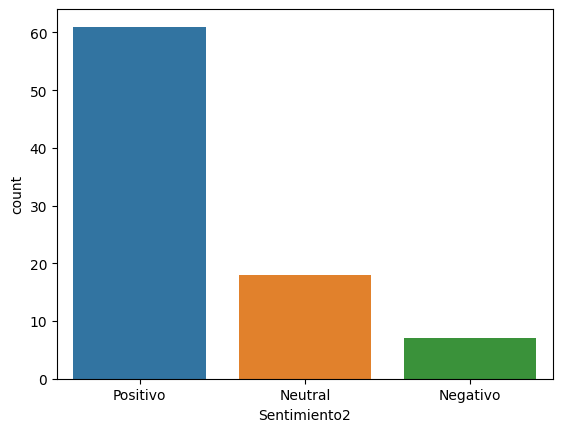

In [36]:
import seaborn as sns
#el verde es el correcto!
x = df.Cleaned_Comment
y = df.Sentimiento2

from collections import Counter

print(Counter(y))
sns.countplot(x=y)

In [37]:
df.head(10)

,Cleaned_Comment,Sentimiento,Sentimiento2
0,awwwww ;),Sentimiento Positivo,Positivo
1,i just listened it’s amazing,Sentimiento Positivo,Positivo
2,"Ok, I'm crying...",Sentimiento Positivo,Positivo
3,We r lucky to witness this ❤️🙌,Sentimiento Positivo,Positivo
4,50 years from now we’ll be telling our grandki...,Sentimiento Neutral,Positivo
5,Great,Sentimiento Positivo,Positivo
6,this is a reupload,Sentimiento Neutral,Neutral
7,🥺❤❤❤♾ Straight to my heart.Proud to love this ...,Sentimiento Positivo,Positivo
8,"im listening the beatles because of you, grand...",Sentimiento Negativo,Positivo
9,We were all here when the Beatles released the...,Sentimiento Neutral,Neutral


In [38]:
df['SCORE'] = df.Sentimiento2

In [ ]:
# Reemplazar etiqueta para el conjunto de datos
df['SCORE'] = df['Sentimiento2'].map({'Positivo': 2, 'Negativo': 0, 'Neutral': 1})
df.head(10)

,Comment,category,Sentimiento,Sentimiento2,SCORE
0,when modi promised “minimum government maximum...,Negativo,Sentimiento Positivo,Positivo,2
1,talk all the nonsense and continue all the dra...,Neutro,Sentimiento Negativo,Negativo,0
2,what did just say vote for modi welcome bjp t...,Positivo,Sentimiento Positivo,Positivo,2
3,asking his supporters prefix chowkidar their n...,Positivo,Sentimiento Negativo,Negativo,0
4,answer who among these the most powerful world...,Positivo,Sentimiento Positivo,Positivo,2
5,kiya tho refresh maarkefir comment karo,Neutro,Sentimiento Neutral,Neutral,1
6,surat women perform yagna seeks divine grace f...,None,Sentimiento Positivo,Positivo,2
7,""",""Neutro""",None,Sentimiento Neutral,Neutral,1
8,this comes from cabinet which has scholars lik...,Neutro,Sentimiento Positivo,Positivo,2
9,with upcoming election india saga going import...,Positivo,Sentimiento Positivo,Positivo,2


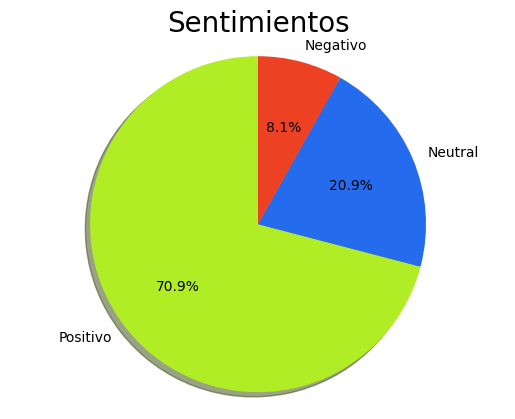

In [39]:
import matplotlib.pyplot as plt

labels = 'Positivo', 'Neutral', 'Negativo'
colors = ['#B1ED24', '#246BED', '#ED4124']

plt.pie(df['SCORE'].value_counts(), labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Sentimientos', fontsize=20)
plt.axis('equal')
plt.show()


In [40]:
print(df.columns)

Index(['Cleaned_Comment', 'Sentimiento', 'Sentimiento2', 'SCORE'], dtype='object')


In [41]:
dfNew = df[['Sentimiento2','SCORE']]
dfNew.head()

,Sentimiento2,SCORE
0,Positivo,Positivo
1,Positivo,Positivo
2,Positivo,Positivo
3,Positivo,Positivo
4,Positivo,Positivo


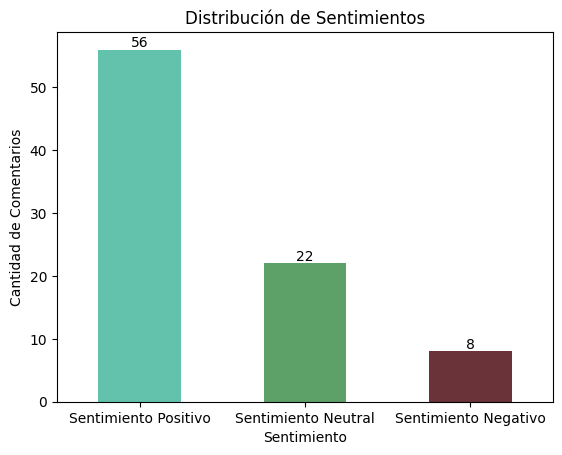

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Asignar valores a la columna 'compound' basándose en la columna 'SCORE'
df['compound'] = df['SCORE'].map({1.0: 'Positivo', 2.0: 'Neutro', 0.0: 'Negativo'})

#df['compound'] = df['SCORE'].map({1.0: 0.1, 2.0: 0, 0.0: -0.1})

# Gráfico de Barras para el Sentimiento con colores y etiquetas
sentimiento_counts = df['Sentimiento'].value_counts()
colors = ['#62C2AC', '#5DA169', '#6A3339']  # Colores para cada categoría de sentimiento
sentimiento_counts.plot(kind='bar', color=colors)
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Comentarios')

# Agregar etiquetas en las barras
for i, count in enumerate(sentimiento_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Rotar las etiquetas del eje x
plt.xticks(rotation=0)
plt.show()


In [43]:
# Asignación aleatoria de datos de entrenamiento y prueba
import numpy as np
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

# Eliminar filas con valores nulos en la columna 'Cleaned_Comment'

train_clean = train.dropna(subset=['Cleaned_Comment'])
test_clean = test.dropna(subset=['Cleaned_Comment'])


# Crear un nuevo vectorizador
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')

# Ajustar y transformar los datos de entrenamiento
train_matrix = vectorizer.fit_transform(train_clean['Cleaned_Comment'])


# Transformar los datos de prueba
test_matrix = vectorizer.transform(test_clean['Cleaned_Comment'])



In [47]:
# REGRESION LINEAL
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [48]:
X_train = train_matrix
X_test = test_matrix
y_train = train['SCORE']
y_test = test['SCORE']

In [49]:
lr.fit(X_train,y_train)

LogisticRegression()

In [56]:
predictions = lr.predict(X_test)

In [51]:
from sklearn.metrics import roc_auc_score

def mide_error(nombre_modelo, y_pred):
    auc = roc_auc_score(y_test, y_pred)
    print(f'AUC de {nombre_modelo}: ', round(auc,2))

In [52]:
from sklearn.metrics import roc_auc_score

def mide_error(nombre_modelo, y_true, y_pred):
    # Eliminar filas con valores NaN en y_true
    y_true_clean = y_true.dropna()

    if len(np.unique(y_true_clean)) > 2:
        # Si es un problema de clasificación múltiple, utilizamos 'ovr' en roc_auc_score
        auc = roc_auc_score(y_true_clean, y_pred, multi_class='ovr')
    else:
        # Si es un problema de clasificación binaria, tomamos las probabilidades de la clase positiva
        auc = roc_auc_score(y_true_clean, y_pred[:, 1])

    print(f'AUC de {nombre_modelo}: ', round(auc, 2))

# CALCULO DE ERROR REGRESION LOGISTICA
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='newton-cg', C=1.0)  # Puedes ajustar el valor de C
logreg.fit(X_train, y_train)

# Usamos predict_proba para obtener probabilidades
y_pred_proba = logreg.predict_proba(X_test)

# Medimos el error
mide_error('Regresión Logística', y_test, y_pred_proba)


AUC de Regresión Logística:  0.12


In [55]:
# Antes de calcular la matriz de confusión, asegúrate de que 'y_true' y 'y_pred_labels' tengan la misma longitud
min_length = min(len(y_true_clean), len(y_pred))
y_true = y_true_clean[:min_length]
y_pred_labels = y_pred[:min_length]

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_pred, y_true_clean)

# Muestra la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

# Calcula y muestra el informe de clasificación
class_report = classification_report(y_pred_labels, y_true)
print("\nInforme de Clasificación:")
print(class_report)


NameError: ignored

In [54]:
##new version:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd



# CALCULO DE MATRIZ DE CONFUSION
conf_matrix = confusion_matrix(predictions, y_test)

# Muestra la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)



Matriz de Confusión:
[[ 1  1]
 [ 2 16]]


In [ ]:
# Antes de calcular el informe de clasificación, asegúrate de que 'y_test' y 'predictions' tengan la misma longitud
min_length = min(len(y_test), len(predictions))
y_test = y_test[:min_length]
predictions = predictions[:min_length]

# Calcula y muestra el informe de clasificación
print(classification_report(predictions, y_test))

# Calcula y muestra el informe de clasificación
class_report = classification_report(predictions, y_test)
print("\nInforme de Clasificación:")
print(class_report)


NameError: ignored

BERT!!!